# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-06-02

# 1. 기초 설정

## 사용 라이브러리

In [1]:
import requests
import json
import pandas as pd

from dotenv import load_dotenv
import os

import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')


## 기타 설정

In [2]:
# 데이터 프레임 열 전부 표시
pd.set_option('display.max_columns', None)

In [3]:
load_dotenv()
myKEY = os.environ.get('PUBLIC_DATA_API_KEY')

# 2. API 데이터 수집

## A. [환경부 국립환경과학원_골프장 농약사용량 DB](https://www.data.go.kr/data/15000937/openapi.do)

In [4]:
new_columns = {
    'SPOT_STD_CODE': '지점표준코드',
    'SIDO': '시도',
    'GOLFCLUB_NAME': '골프장명',
    'GOLF_TYPE_NAME': '골프장 형태',
    'ADDRESS': '소재지',
    'HOLE_CNT': '홀수',
    'REG_YEAR': '개장년도',
    'YEAR': '입력년도',
    'PES_GROUND': '농약사용면적(m2)',
    'TOTAL_GROUND': '면적총계(m2)',
    'NONE_GROUND': '농약미사용면적(m2)',
    'SPRAY_SUPPLY': '총사용량_실물량(kg)',
    'REAL_SUPPLY': '총사용량_성분량(kg)',
    'THA_SPRAY': '전체면적대비_ha_실물량(kg)',
    'THA_REAL': '전체면적대비_ha_성분량(kg)',
    'HA_SPRAY': '농약사용_ha_실물량(kg)',
    'HA_REAL': '농약사용_ha_성분량(kg)'
}

In [5]:
# 시군구 추출 함수 - 주소를 공백을 기준으로 나눠 시군구 추출
def ExtractSigungoo(address):
    parts = address.split()
    if len(parts) > 1: #주소가 둘 이상으로 쪼개질 경우
        return parts[1]
    return None

In [6]:
def GetGolf(key, sido, year):
    url = 'http://apis.data.go.kr/1480523/SgisGp/getSgisGpList1' #API 호출 URL
    params = {'serviceKey' : key, 'pageNo' : '1', 'numOfRows' : '1000', 'resultType' : 'JSON', 'search_year': year} #parameter 지정
    response = requests.get(url, params=params) #API 호출 응답 결과 저장
    result = json.loads(response.content) #응답을 json 형식으로 변환
    golf = pd.DataFrame(result['getSgisGpList']['item']) #item 항목을 data frame으로 저장 - 전국 데이터

    # column 이름 변경
    golf.rename(columns=new_columns, inplace=True)

    # 시군구 컬럼 추가
    golf['시군구'] = golf['소재지'].apply(ExtractSigungoo)

    # 시도 컬럼 바로 옆에 시군구 컬럼 배치
    columns = list(golf.columns)
    sido_index = columns.index('시도') #'시도' column의 index 추출
    columns.insert(sido_index + 1, columns.pop(columns.index('시군구'))) #바로 옆에 추가하고 기존 column을 삭제
    golf = golf[columns]

    return golf[golf['시도']==sido].reset_index(drop=True)

In [7]:
golf_2020 = GetGolf(myKEY, '경기도', '2020')
golf_2019 = GetGolf(myKEY, '경기도', '2019')
golf_2018 = GetGolf(myKEY, '경기도', '2018')

In [8]:
golf_2020.sample()

,지점표준코드,입력년도,골프장명,소재지,홀수,시도,시군구,개장년도,골프장 형태,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg)
121,41650G040200003,2020,일동레이크GC,경기도 포천시 일동면 유동리 21-2,9,경기도,포천시,1995,대중제,389684,266845,122839,139.6,62.999,2.3608836590530085,5.231501433416403,1.6166688906909188,3.5823898338140645


In [9]:
golf_2020.shape

(165, 18)

In [10]:
golf_2019.sample()

,지점표준코드,입력년도,골프장명,소재지,홀수,시도,시군구,개장년도,골프장 형태,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg)
30,41670G040200006,2019,스카이밸리CC,경기도 여주시 북내면 운촌리 산 40,27,경기도,여주시,2011,회원제,1048693,528661,520032,1141.46,304.62,5.76,21.59,2.9,10.88


In [11]:
golf_2019.shape

(162, 18)

In [12]:
golf_2018.sample()

,지점표준코드,입력년도,골프장명,소재지,홀수,시도,시군구,개장년도,골프장 형태,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg)
85,41500G040100003,2018,비에이비스타C.C.,경기도 이천시 모가면 어농리 386-1,36,경기도,이천시,2003,회원제,1580588.0,947683.0,6329905.0,528.1999,151.7982,1.601782452571166,5.573592646486219,0.9603906900469952,3.3417936869063913


In [13]:
golf_2018.shape

(160, 18)

In [14]:
# '시군구' 컬럼의 값 정제
golf_2019.loc[golf_2019['시군구'] == '기흥구', '시군구'] = '용인시기흥구'
golf_2019.loc[golf_2019['시군구'] == '처인구', '시군구'] = '용인시처인구'
golf_2018.loc[golf_2018['시군구'] == '여주군', '시군구'] = '여주시'

In [15]:
print('2020:', np.sort(golf_2020['시군구'].unique()))
print()
print('2019:', np.sort(golf_2019['시군구'].unique()))
print()
print('2018:', np.sort(golf_2018['시군구'].unique()))

2020: ['가평군' '고양시덕양구' '광주시' '군포시' '김포시' '남양주시' '동두천시' '성남시분당구' '성남시수정구' '수원시권선구'
 '시흥시' '안산시단원구' '안산시상록구' '안성시' '양주시' '양평군' '여주시' '연천군' '용인시기흥구' '용인시처인구'
 '이천시' '파주시' '평택시' '포천시' '하남시' '화성시']

2019: ['가평군' '고양시덕양구' '광주시' '군포시' '김포시' '남양주시' '동두천시' '성남시분당구' '성남시수정구' '수원시권선구'
 '시흥시' '안산시단원구' '안산시상록구' '안성시' '양주시' '양평군' '여주시' '연천군' '용인시기흥구' '용인시처인구'
 '이천시' '파주시' '평택시' '포천시' '하남시' '화성시']

2018: ['가평군' '고양시덕양구' '광주시' '군포시' '김포시' '남양주시' '동두천시' '성남시분당구' '성남시수정구' '수원시권선구'
 '시흥시' '안산시단원구' '안산시상록구' '안성시' '양주시' '양평군' '여주시' '연천군' '용인시기흥구' '용인시처인구'
 '이천시' '파주시' '평택시' '포천시' '하남시' '화성시']


In [16]:
# '시군구'를 '시' 수준으로 변환하기 위한 사전 정의
si_mapping = {
    '고양시덕양구': '고양시',
    '성남시분당구': '성남시',
    '성남시수정구': '성남시',
    '수원시권선구': '수원시',
    '안산시단원구': '안산시',
    '안산시상록구': '안산시',
    '용인시기흥구': '용인시',
    '용인시처인구': '용인시'
}

# 변환 함수 정의
def transform_si(dataframe, column, mapping):
    dataframe[column] = dataframe[column].replace(mapping)
    return dataframe

# 각 데이터프레임에 대해 변환 적용
golf_2020 = transform_si(golf_2020, '시군구', si_mapping)
golf_2019 = transform_si(golf_2019, '시군구', si_mapping)
golf_2018 = transform_si(golf_2018, '시군구', si_mapping)

In [17]:
print('2020:', np.sort(golf_2020['시군구'].unique()))
print()
print('2019:', np.sort(golf_2019['시군구'].unique()))
print()
print('2018:', np.sort(golf_2018['시군구'].unique()))

2020: ['가평군' '고양시' '광주시' '군포시' '김포시' '남양주시' '동두천시' '성남시' '수원시' '시흥시' '안산시' '안성시'
 '양주시' '양평군' '여주시' '연천군' '용인시' '이천시' '파주시' '평택시' '포천시' '하남시' '화성시']

2019: ['가평군' '고양시' '광주시' '군포시' '김포시' '남양주시' '동두천시' '성남시' '수원시' '시흥시' '안산시' '안성시'
 '양주시' '양평군' '여주시' '연천군' '용인시' '이천시' '파주시' '평택시' '포천시' '하남시' '화성시']

2018: ['가평군' '고양시' '광주시' '군포시' '김포시' '남양주시' '동두천시' '성남시' '수원시' '시흥시' '안산시' '안성시'
 '양주시' '양평군' '여주시' '연천군' '용인시' '이천시' '파주시' '평택시' '포천시' '하남시' '화성시']


In [18]:
golf_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점표준코드             165 non-null    object
 1   입력년도               165 non-null    object
 2   골프장명               165 non-null    object
 3   소재지                165 non-null    object
 4   홀수                 165 non-null    object
 5   시도                 165 non-null    object
 6   시군구                165 non-null    object
 7   개장년도               165 non-null    object
 8   골프장 형태             165 non-null    object
 9   면적총계(m2)           165 non-null    object
 10  농약사용면적(m2)         165 non-null    object
 11  농약미사용면적(m2)        165 non-null    object
 12  총사용량_실물량(kg)       165 non-null    object
 13  총사용량_성분량(kg)       165 non-null    object
 14  농약사용_ha_성분량(kg)    165 non-null    object
 15  농약사용_ha_실물량(kg)    165 non-null    object
 16  전체면적대비_ha_성분량(kg)  165 non-null    object
 1

In [19]:
# 데이터 저장
golf_2020.to_csv('../data/golf_Gyeonggi_2020.csv', index=False, encoding='utf-8-sig')

In [20]:
golf_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점표준코드             162 non-null    object
 1   입력년도               162 non-null    object
 2   골프장명               162 non-null    object
 3   소재지                162 non-null    object
 4   홀수                 162 non-null    object
 5   시도                 162 non-null    object
 6   시군구                162 non-null    object
 7   개장년도               162 non-null    object
 8   골프장 형태             162 non-null    object
 9   면적총계(m2)           162 non-null    object
 10  농약사용면적(m2)         162 non-null    object
 11  농약미사용면적(m2)        162 non-null    object
 12  총사용량_실물량(kg)       162 non-null    object
 13  총사용량_성분량(kg)       162 non-null    object
 14  농약사용_ha_성분량(kg)    162 non-null    object
 15  농약사용_ha_실물량(kg)    162 non-null    object
 16  전체면적대비_ha_성분량(kg)  162 non-null    object
 1

In [21]:
# 데이터 저장
golf_2019.to_csv('../data/golf_Gyeonggi_2019.csv', index=False, encoding='utf-8-sig')

In [22]:
golf_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점표준코드             160 non-null    object
 1   입력년도               160 non-null    object
 2   골프장명               160 non-null    object
 3   소재지                160 non-null    object
 4   홀수                 160 non-null    object
 5   시도                 160 non-null    object
 6   시군구                160 non-null    object
 7   개장년도               160 non-null    object
 8   골프장 형태             160 non-null    object
 9   면적총계(m2)           160 non-null    object
 10  농약사용면적(m2)         160 non-null    object
 11  농약미사용면적(m2)        160 non-null    object
 12  총사용량_실물량(kg)       160 non-null    object
 13  총사용량_성분량(kg)       160 non-null    object
 14  농약사용_ha_성분량(kg)    160 non-null    object
 15  농약사용_ha_실물량(kg)    160 non-null    object
 16  전체면적대비_ha_성분량(kg)  160 non-null    object
 1

In [23]:
# 데이터 저장
golf_2018.to_csv('../data/golf_Gyeonggi_2018.csv', index=False, encoding='utf-8-sig')

## B. [경기도,「경기도기본통계」, 2020, 2024.06.02, 강수량](https://kosis.kr/statHtml/statHtml.do?orgId=210&tblId=DT_21002A005&conn_path=I2)

In [24]:
rain_2020 = pd.read_csv('../data/강수량_20240602132938.csv', encoding='cp949', header=1)
rain_2019 = pd.read_csv('../data/강수량_20240602132955.csv', encoding='cp949', header=1)
rain_2018 = pd.read_csv('../data/강수량_20240602133004.csv', encoding='cp949', header=1)

In [25]:
# 북부/남부 구분 제거
rain_2020 = rain_2020.drop(columns='시군별(1)')
rain_2019 = rain_2019.drop(columns='시군별(1)')
rain_2018 = rain_2018.drop(columns='시군별(1)')

In [26]:
# 소계 데이터 제거
rain_2020 = rain_2020[rain_2020['시군별(2)']!='소계']
rain_2019 = rain_2019[rain_2019['시군별(2)']!='소계']
rain_2018 = rain_2018[rain_2018['시군별(2)']!='소계']

In [27]:
rain_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2 to 33
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군별(2)  31 non-null     object 
 1   계       31 non-null     float64
 2   1월      31 non-null     float64
 3   2월      31 non-null     float64
 4   3월      31 non-null     float64
 5   4월      31 non-null     float64
 6   5월      31 non-null     float64
 7   6월      31 non-null     float64
 8   7월      31 non-null     float64
 9   8월      31 non-null     float64
 10  9월      31 non-null     float64
 11  10월     31 non-null     object 
 12  11월     31 non-null     float64
 13  12월     31 non-null     object 
dtypes: float64(11), object(3)
memory usage: 3.6+ KB


In [28]:
# 데이터 저장
rain_2020.to_csv('../data/rain_Gyeonggi_2020.csv', index=False, encoding='utf-8-sig')

In [29]:
rain_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2 to 33
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군별(2)  31 non-null     object 
 1   계       31 non-null     float64
 2   1월      31 non-null     object 
 3   2월      31 non-null     float64
 4   3월      31 non-null     float64
 5   4월      31 non-null     float64
 6   5월      31 non-null     float64
 7   6월      31 non-null     float64
 8   7월      31 non-null     float64
 9   8월      31 non-null     float64
 10  9월      31 non-null     float64
 11  10월     31 non-null     float64
 12  11월     31 non-null     float64
 13  12월     31 non-null     float64
dtypes: float64(12), object(2)
memory usage: 3.6+ KB


In [30]:
# 데이터 저장
rain_2019.to_csv('../data/rain_Gyeonggi_2019.csv', index=False, encoding='utf-8-sig')

In [31]:
rain_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2 to 33
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군별(2)  31 non-null     object 
 1   계       31 non-null     float64
 2   1월      31 non-null     object 
 3   2월      31 non-null     float64
 4   3월      31 non-null     float64
 5   4월      31 non-null     float64
 6   5월      31 non-null     float64
 7   6월      31 non-null     float64
 8   7월      31 non-null     float64
 9   8월      31 non-null     float64
 10  9월      31 non-null     float64
 11  10월     31 non-null     float64
 12  11월     31 non-null     float64
 13  12월     31 non-null     float64
dtypes: float64(12), object(2)
memory usage: 3.6+ KB


In [32]:
# 데이터 저장
rain_2018.to_csv('../data/rain_Gyeonggi_2018.csv', index=False, encoding='utf-8-sig')

## C. [환경부 국립환경과학원_수질 DB](https://www.data.go.kr/data/15081073/openapi.do)

### 시도별 수질측정망 지점

In [33]:
code_df = pd.read_excel('../API documents/국립환경과학원_openAPI_활용가이드_수질DB/물환경 수질측정망 운영결과 DB_물환경_코드_코드명.xlsx', header=1)
code_df

,구분,지점코드,지점명,조사기관,주소,대권역,중권역
0,하천수,1001A05,송천1,원주지방환경청,강원도 평창군 대관령면 용산리(용산교),한강,남한강상류
1,하천수,1001A10,송천4,원주지방환경청,강원도 정선군 여량면 유천리(송천교),한강,남한강상류
2,하천수,1001A15,골지천2,한국수자원공사,강원도 태백시 하사미동 290-1(하사미교),한강,남한강상류
3,하천수,1001A20,번천,한국수자원공사,강원도 삼척시 하장면 숙암리 90-4,한강,남한강상류
4,하천수,1001A25,골지천4,원주지방환경청,강원도 정선군 여량면 여량리(여량1교),한강,남한강상류
...,...,...,...,...,...,...,...
2213,하천수,5101A05,탐진강1(탐진A1),영산강물환경연구소,전라남도 장흥군 유치면 운월리(운월교),영산강ㆍ섬진강,탐진강
2214,하천수,5101A15,유치천1(탐진A2),영산강물환경연구소,전라남도 영암군 금정면 연소리(한대교),영산강ㆍ섬진강,탐진강
2215,하천수,5101A25,옴천천2(탐진A3),영산강물환경연구소,전라남도 강진군 옴천면 봉림리(봉림교),영산강ㆍ섬진강,탐진강
2216,하천수,5101A45,금강천1(탐진B1),영산강물환경연구소,전라남도 강진군 병영면 삭양리(삭양교),영산강ㆍ섬진강,탐진강


In [34]:
# 주소 컬럼의 데이터를 공백을 기준으로 분리하여 시도, 시군구 추출
code_df['시도'] = code_df['주소'].apply(lambda x: x.split()[0])
code_df['시군구'] = code_df['주소'].apply(lambda x: x.split()[1])

print(code_df['시도'].unique())
print()
print(code_df['시군구'].unique())

['강원도' '충청북도' '경기도' '서울특별시' '인천광역시' '충청남도' '인천광역시시' '경상북도' '경북' '대구광역시'
 '대구광역시시' '경상남도' '전라북도' '부산광역시' '울산광역시' '울산광역시시' '부산광역시시' '대전광역시' '대전광역시시'
 '세종특별자치시' '전라남도' '광주' '광주광역시' '제주특별자치도']

['평창군' '정선군' '태백시' '삼척시' '영월군' '횡성군' '원주시' '단양군' '제천시' '충주시' '청주시' '괴산군'
 '보은군' '음성군' '홍천군' '안성시' '이천시' '여주시' '양평군' '용인시' '화천군' '양구군' '춘천시' '인제군'
 '가평군' '남양주시' '광주시' '강동구' '성남시' '강남구' '성동구' '의정부시' '노원구' '성북구' '동대문구' '중구'
 '용산구' '영등포구' '마포구' '군포시' '안양시' '구로구' '동작구' '양천구' '강서구' '고양시' '김포시' '계양구'
 '파주시' '연천군' '철원군' '포천시' '양주시' '동두천시' '하남시' '구리시' '송파구' '천안시' '평택시' '화성시'
 '오산시' '의왕시' '수원시' '아산시' '강화군' '서구' '시흥시' '남동구' '화성군' '안산시' '고성군' '양양군'
 '속초시' '강릉시' '동해시' '봉화군' '안동시' '영양군' '청송군' '예천군' '의성군' '영주시' '문경시' '상주시'
 '군위군' '구미시' '김천시' '칠곡군' '성주군' '달성군' '영천시' '경산시' '동구' '북구' '달서구' '수성구'
 '합천군' '고령군' '창녕군' '달성구' '거창군' '의령군' '함양군' '남원시' '산청군' '진주시' '사천시' '하동군'
 '함안군' '창원시' '밀양시' '김해시' '경주시' '청도군' '양산시' '사상구' '사하구' '포항시' '울주군' '포항'
 '남구' '금정구' '수영구' '기장군' '동래구' '해운대구광역시' '부산광역시진구' '울진군' '영덕군' '남해군' '거제시'
 '창원' 

In [35]:
sido_correction = {
    '서울특별시': '서울특별시',
    '인천광역시': '인천광역시',
    '인천광역시시': '인천광역시',
    '대구광역시': '대구광역시',
    '대구광역시시': '대구광역시',
    '부산광역시': '부산광역시',
    '부산광역시시': '부산광역시',
    '경기도': '경기도',
    '강원도': '강원도',
    '충청북도': '충청북도',
    '충청남도': '충청남도',
    '전라북도': '전라북도',
    '전라남도': '전라남도',
    '제주특별자치도': '제주특별자치도',
    '세종특별자치시': '세종특별자치시',
    '경상북도': '경상북도',
    '경북': '경상북도',
    '경상남도': '경상남도',
    '광주광역시': '광주광역시',
    '광주': '광주광역시',
    '울산광역시': '울산광역시',
    '울산광역시시': '울산광역시',
    '대전광역시': '대전광역시',
    '대전광역시시': '대전광역시'
}

In [36]:
# 오타 수정
code_df['시도'] = code_df['시도'].map(sido_correction)
code_df['시도'].unique()

array(['강원도', '충청북도', '경기도', '서울특별시', '인천광역시', '충청남도', '경상북도', '대구광역시',
       '경상남도', '전라북도', '부산광역시', '울산광역시', '대전광역시', '세종특별자치시', '전라남도',
       '광주광역시', '제주특별자치도'], dtype=object)

In [37]:
np.sort(code_df[code_df['시도']=='경기도']['시군구'].unique())

array(['가평군', '고양시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시',
       '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군',
       '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '화성군', '화성시'], dtype=object)

In [38]:
# 경기도 지점코드 추출
codes = code_df[code_df['시도']=='경기도']['지점코드'].unique()
codes_list = list(codes)
code_Gyeonggi = ','.join(codes_list)
code_Gyeonggi

'1007A05,1007A10,1007A15,1007A20,1007A22,1007A25,1007A27,1007A40,1007A42,1007A44,1007A46,1007A50,1007A55,1007A59,1007A60,1007A65,1007A70,1007A75,1007B10,1007B20,1007D35,1007D40,1007D45,1007D50,1007D55,1007D60,1007D65,1007D70,1007D75,1007D80,1007D85,1007D90,1013A70,1013A80,1013A90,1013A95,1015A20,1015A25,1015A30,1015A40,1015A42,1015A47,1015A50,1015A60,1015B10,1015B20,1015B30,1015B40,1016A10,1016A20,1016A30,1016A40,1016A50,1016A60,1016A70,1016A80,1016B10,1016D10,1016D20,1017A10,1017B10,1018A06,1018A12,1018A14,1018A16,1018A28,1018A60,1018A66,1018A70,1018A72,1018D10,1019A10,1019A15,1019A20,1019A25,1019A30,1019A45,1019A50,1019A55,1019A60,1021A05,1021A10,1021B10,1022A10,1022A20,1022A25,1022A30,1022A35,1022A37,1022A40,1022A45,1022A50,1022A55,1022A65,1022A70,1022B15,1022D35,1022D40,1022D45,1022D50,1022D55,1022D60,1022D65,1022D70,1022D75,1022D80,1022E10,1022E20,1022E30,1022E40,1023A10,1023A20,1023A25,1023A30,1023A40,1023A50,1023D20,1023D30,1023D40,1023D50,1023D60,1023D70,1023E10,1024A10,1025A03

### 물환경 수질측정망 운영결과 월평균 DB

In [39]:
new_cols = {
    'PTNO': '조사지점코드',
    'PTNM': '조사지점명',
    'WMYR': '측정년도',
    'WMOD': '측정월',
    'ITEMTCOLI': '측정값(총대장균군)'
}

In [40]:
def GetWaterQuality(key, codes, year):
    url = 'http://apis.data.go.kr/1480523/WaterQualityService/getWaterMeasuringListMavg' #API 호출 URL
    params ={'serviceKey' : key, 'pageNo' : '1', 'numOfRows' : '5000', 'resultType' : 'JSON', 'ptNoList' : codes, 'wmyrList' : year} #parameter 지정
    response = requests.get(url, params=params) #API 호출 응답 결과 저장
    result = json.loads(response.content) #응답을 json 형식으로 변환
    water_qual = pd.DataFrame(result['getWaterMeasuringListMavg']['item']) #item 항목을 data frame으로 저장

    # 분석 대상 column만 추출
    selected_columns = ['PTNM', 'PTNO', 'WMYR', 'WMOD', 'ITEMTCOLI']
    water_qual = water_qual[selected_columns]

    # 컬럼 이름 변경
    water_qual.rename(columns=new_cols, inplace=True)

    return water_qual

In [41]:
WQ_2020 = GetWaterQuality(myKEY, code_Gyeonggi, '2020')
WQ_2019 = GetWaterQuality(myKEY, code_Gyeonggi, '2019')
WQ_2018 = GetWaterQuality(myKEY, code_Gyeonggi, '2018')

In [42]:
WQ_2020.sample()

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
1575,중랑천1,1018A26,2020,03,NaN


In [43]:
WQ_2020.shape

(2690, 5)

In [44]:
WQ_2019.sample()

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
480,이동지2,1101B60,2019,07,54.0


In [45]:
WQ_2019.shape

(2668, 5)

In [46]:
WQ_2018.sample()

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
975,공릉천2,1019A50,2018,05,350.0


In [47]:
WQ_2018.shape

(2799, 5)

#### 결측치 처리

In [48]:
def NullDist(df):
    # 결측치가 있는 행
    na_values = df[df['측정값(총대장균군)'].isna()]
    # 결측치의 측정월 분포 계산
    month_dist = na_values['측정월'].value_counts().sort_index()

    # 측정월을 1월부터 12월까지 정렬
    months = list(range(0, 12))
    month_counts = [month_dist.get(month, 0) for month in months]
    # 바 차트 작성
    plt.bar(months, month_counts, color='skyblue', edgecolor='black')
    plt.xticks(months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

In [49]:
def Interpolate(df, except_codes):
    # 조건을 만족하는 행 필터링
    filtered_data = df[df['조사지점코드'].isin(except_codes)]

    # '조사지점코드'을 기준으로 그룹화하여 '측정값(총대장균군)' 딕셔너리 생성
    coli_dict = {}
    for code, group in filtered_data.groupby('조사지점코드'):
        coli_dict[code] = group['측정값(총대장균군)'].tolist()

    # nan 값의 비율이 50%가 넘는 '조사지점코드'만 except_codes에 남김
    except_codes = [code for code in except_codes if np.mean(pd.Series(coli_dict[code]).isna()) >= 0.5]

    # '조사지점명'을 기준으로 그룹화하여 '측정월' 딕셔너리 생성
    month_dict = {}
    for code, group in df.groupby('조사지점코드'):
        months = group['측정월'].tolist()
        if len(months) < 6: # 측정월이 1년의 절반이 안 되는 경우 배제
            month_dict[code] = group['측정월'].tolist()

    # except_codes에 위 경우에 해당하는 '조사지점코드'추가
    new_keys = list(month_dict.keys())
    except_codes.extend(new_keys)

    # except_codes를 전체 데이터에서 배제
    df = df[~df['조사지점코드'].isin(except_codes)]
    df.isnull().sum()

    # 전체 결측치에 대해 선형 보간
    df.interpolate(method='linear', inplace=True, limit_direction='both')

    return df

2020년

In [50]:
# 결측치 수와 비율 계산
mis_count_2020 = WQ_2020.isnull().sum()
mis_ratio_2020 = round(mis_count_2020 / len(WQ_2020) * 100, 2)

# 결측치 수와 비율 출력
mis_info_2020 = pd.concat([mis_count_2020, mis_ratio_2020], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(mis_info_2020)

            결측치 수  결측치 비율 (%)
조사지점명           0        0.00
조사지점코드          0        0.00
측정년도            0        0.00
측정월             0        0.00
측정값(총대장균군)    937       34.83


In [51]:
# '조사지점코드'을 기준으로 '측정월'을 바르게 정렬
WQ_2020 = WQ_2020.groupby('조사지점코드').apply(lambda x: x.sort_values('측정월', ascending=True)).reset_index(drop=True)
WQ_2020

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
0,오갑천,1007A01,2020,01,NaN
1,오갑천,1007A01,2020,02,NaN
2,오갑천,1007A01,2020,03,NaN
3,오갑천,1007A01,2020,04,NaN
4,오갑천,1007A01,2020,05,NaN
...,...,...,...,...,...
2685,C원정리수로,1202E80,2020,08,NaN
2686,C원정리수로,1202E80,2020,09,80000.0
2687,C원정리수로,1202E80,2020,10,1100000.0
2688,C원정리수로,1202E80,2020,11,230000.0


In [52]:
WQ_2020.describe()

,측정값(총대장균군)
count,1.753000e+03
mean,1.069166e+05
std,8.834178e+05
min,-6.900000e+01
25%,3.300000e+02
50%,3.500000e+03
75%,2.400000e+04
max,2.600000e+07


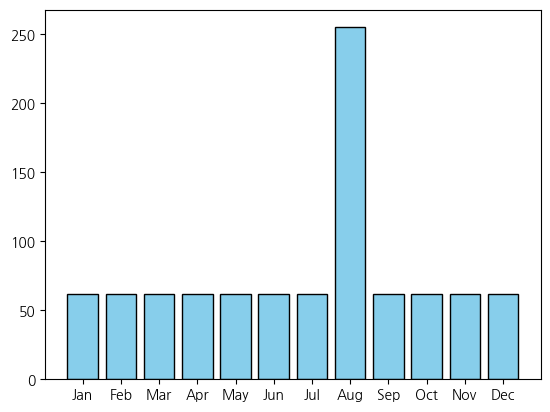

In [53]:
NullDist(WQ_2020)

In [54]:
except_codes_2020 = list(WQ_2020[(WQ_2020['측정값(총대장균군)'].isna()) & (WQ_2020['측정월']!='08')]['조사지점코드'].unique())
print(except_codes_2020)

['1007A01', '1007A03', '1007A11', '1007A12', '1007A14', '1007A21', '1007A41', '1007A43', '1007A45', '1007A52', '1007A57', '1007A58', '1007A61', '1007A63', '1007A67', '1007A80', '1007A85', '1007A90', '1015A10', '1015A27', '1015A41', '1015A45', '1015A55', '1016A32', '1016A35', '1016A37', '1016A45', '1016A52', '1016A55', '1016A57', '1016A65', '1016A72', '1016A75', '1018A08', '1018A10', '1018A26', '1018A58', '1018A62', '1018A64', '1018A68', '1018A74', '1019A07', '1019A09', '1019A32', '1019A41', '1019A43', '1019A47', '1019A52', '1019A57', '1019A59', '1021A20', '1022A42', '1022A51', '1022A53', '1022A80', '1023A15', '1023A22', '1023A27', '1025A30', '1025A33', '1025A42', '1025A45']


In [55]:
WQ_2020 = Interpolate(WQ_2020, except_codes_2020)
WQ_2020.isnull().sum()

조사지점명         0
조사지점코드        0
측정년도          0
측정월           0
측정값(총대장균군)    0
dtype: int64

In [56]:
WQ_2020.describe()

,측정값(총대장균군)
count,1.914000e+03
mean,1.160790e+05
std,9.048030e+05
min,-6.900000e+01
25%,4.000000e+02
50%,4.100000e+03
75%,2.500000e+04
max,2.600000e+07


2019년

In [57]:
# 결측치 수와 비율 계산
mis_count_2019 = WQ_2019.isnull().sum()
mis_ratio_2019 = round(mis_count_2019 / len(WQ_2019) * 100, 2)

# 결측치 수와 비율 출력
mis_info_2019 = pd.concat([mis_count_2019, mis_ratio_2019], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(mis_info_2019)

            결측치 수  결측치 비율 (%)
조사지점명           0        0.00
조사지점코드          0        0.00
측정년도            0        0.00
측정월             0        0.00
측정값(총대장균군)    797       29.87


In [58]:
# '조사지점코드'을 기준으로 '측정월'을 바르게 정렬
WQ_2019 = WQ_2019.groupby('조사지점코드').apply(lambda x: x.sort_values('측정월', ascending=True)).reset_index(drop=True)
WQ_2019

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
0,오갑천,1007A01,2019,01,NaN
1,오갑천,1007A01,2019,02,NaN
2,오갑천,1007A01,2019,03,NaN
3,오갑천,1007A01,2019,04,NaN
4,오갑천,1007A01,2019,05,NaN
...,...,...,...,...,...
2663,C원정리수로,1202E80,2019,09,2000000.0
2664,C원정리수로,1202E80,2019,10,65000.0
2665,C원정리수로,1202E80,2019,11,16000.0
2666,C원정리수로,1202E80,2019,12,58000.0


In [59]:
WQ_2019.describe()

,측정값(총대장균군)
count,1.871000e+03
mean,1.428980e+05
std,3.060869e+06
min,0.000000e+00
25%,3.300000e+02
50%,3.100000e+03
75%,2.100000e+04
max,1.300000e+08


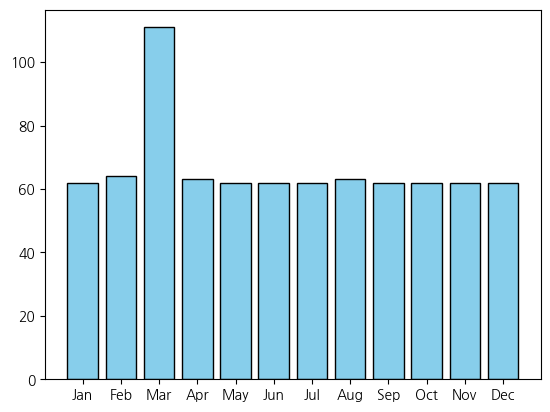

In [60]:
NullDist(WQ_2019)

In [61]:
except_codes_2019 = list(WQ_2019[(WQ_2019['측정값(총대장균군)'].isna()) & (WQ_2020['측정월']!='03')]['조사지점코드'].unique())
print(except_codes_2019)

['1007A42', '1007A59', '1007B20', '1007D35', '1007D80', '1007D85', '1015A10', '1015A27', '1015A41', '1015A45', '1015A55', '1015B40', '1016A32', '1016A45', '1016A52', '1016A65', '1016A72', '1016D10', '1016D20', '1018A08', '1018A26', '1018A58', '1018A62', '1018A68', '1018A74', '1019A32', '1019A47', '1019A52', '1019A57', '1021A20', '1022A42', '1022A51', '1022A80', '1023A15', '1023A22', '1023A27', '1023D20', '1023D30', '1023D40', '1023D50', '1023D60', '1023D70', '1025A30', '1025A42', '1101A30', '1101D03', '1101D06', '1101D09', '1101D12', '1101D15', '1101D18', '1101D21', '1101D57', '1101D60', '1101D63', '1201D05', '1202D10', '1202D20', '1202D30', '1202D50', '1202D60', '3011D60']


In [62]:
WQ_2019 = Interpolate(WQ_2019, except_codes_2019)
WQ_2019.isnull().sum()

조사지점명         0
조사지점코드        0
측정년도          0
측정월           0
측정값(총대장균군)    0
dtype: int64

In [63]:
WQ_2019.describe()

,측정값(총대장균군)
count,2.272000e+03
mean,1.218254e+05
std,2.777986e+06
min,0.000000e+00
25%,3.500000e+02
50%,3.100000e+03
75%,1.987885e+04
max,1.300000e+08


In [64]:
WQ_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2272 entries, 0 to 2666
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   조사지점명       2272 non-null   object 
 1   조사지점코드      2272 non-null   object 
 2   측정년도        2272 non-null   object 
 3   측정월         2272 non-null   object 
 4   측정값(총대장균군)  2272 non-null   float64
dtypes: float64(1), object(4)
memory usage: 106.5+ KB


2018년

In [65]:
# 결측치 수와 비율 계산
mis_count_2018 = WQ_2018.isnull().sum()
mis_ratio_2018 = round(mis_count_2018 / len(WQ_2018) * 100, 2)

# 결측치 수와 비율 출력
mis_info_2018 = pd.concat([mis_count_2018, mis_ratio_2018], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(mis_info_2018)

            결측치 수  결측치 비율 (%)
조사지점명           0         0.0
조사지점코드          0         0.0
측정년도            0         0.0
측정월             0         0.0
측정값(총대장균군)    946        33.8


In [66]:
# '조사지점코드'을 기준으로 '측정월'을 바르게 정렬
WQ_2018 = WQ_2018.groupby('조사지점코드').apply(lambda x: x.sort_values('측정월', ascending=True)).reset_index(drop=True)
WQ_2018

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
0,오갑천,1007A01,2018,01,NaN
1,오갑천,1007A01,2018,02,NaN
2,오갑천,1007A01,2018,03,NaN
3,오갑천,1007A01,2018,04,NaN
4,오갑천,1007A01,2018,05,NaN
...,...,...,...,...,...
2794,C원정리수로,1202E80,2018,12,230000.0
2795,광혜저수지,3011D60,2018,03,NaN
2796,광혜저수지,3011D60,2018,05,NaN
2797,광혜저수지,3011D60,2018,07,NaN


In [67]:
WQ_2018.describe()

,측정값(총대장균군)
count,1.853000e+03
mean,1.412922e+05
std,6.052171e+05
min,0.000000e+00
25%,5.500000e+02
50%,5.975000e+03
75%,3.900000e+04
max,8.000000e+06


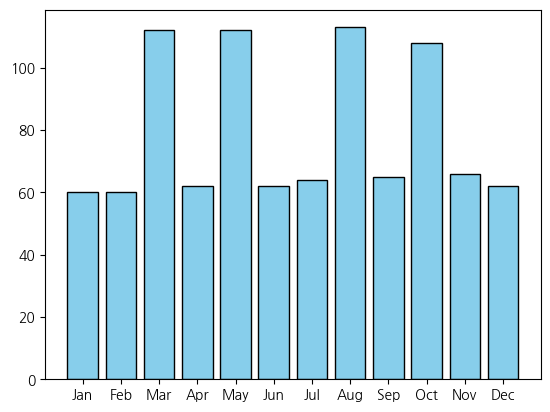

In [68]:
NullDist(WQ_2018)

In [69]:
except_codes_2018 = list(WQ_2018[(WQ_2018['측정값(총대장균군)'].isna()) & (~WQ_2018['측정월'].isin(['03', '05', '08', '10']))]['조사지점코드'].unique())
print(except_codes_2018)

['1007A01', '1007A03', '1007A11', '1007A12', '1007A14', '1007A21', '1007A41', '1007A43', '1007A45', '1007A52', '1007A57', '1007A58', '1007A61', '1007A63', '1007A67', '1007A80', '1007A85', '1007A90', '1007D90', '1015A10', '1015A27', '1015A41', '1015A45', '1015A55', '1016A32', '1016A35', '1016A37', '1016A45', '1016A52', '1016A55', '1016A57', '1016A65', '1016A72', '1016A75', '1018A08', '1018A10', '1018A26', '1018A58', '1018A62', '1018A64', '1018A68', '1018A74', '1018D10', '1019A07', '1019A09', '1019A32', '1019A41', '1019A43', '1019A47', '1019A52', '1019A57', '1019A59', '1021A20', '1022A42', '1022A51', '1022A53', '1022A80', '1022D55', '1022D60', '1023A15', '1023A22', '1023A27', '1025A30', '1025A33', '1025A42', '1025A45', '1101B45', '3011D60']


In [70]:
WQ_2018 = Interpolate(WQ_2018, except_codes_2018)
WQ_2018.isnull().sum()

조사지점명         0
조사지점코드        0
측정년도          0
측정월           0
측정값(총대장균군)    0
dtype: int64

In [71]:
WQ_2018.describe()

,측정값(총대장균군)
count,1.859000e+03
mean,1.408368e+05
std,6.042921e+05
min,0.000000e+00
25%,5.400000e+02
50%,5.900000e+03
75%,3.900000e+04
max,8.000000e+06


In [72]:
WQ_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 24 to 2794
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   조사지점명       1859 non-null   object 
 1   조사지점코드      1859 non-null   object 
 2   측정년도        1859 non-null   object 
 3   측정월         1859 non-null   object 
 4   측정값(총대장균군)  1859 non-null   float64
dtypes: float64(1), object(4)
memory usage: 87.1+ KB


#### 데이터 저장

In [73]:
def Merge(df):
    # 지점코드를 기준으로 시군구 병합
    merged_df = pd.merge(df, code_df[['지점코드', '시군구']], how='left', left_on='조사지점코드', right_on='지점코드').drop(columns='지점코드')
    return merged_df

In [74]:
WQ_2020 = Merge(WQ_2020)
WQ_2019 = Merge(WQ_2019)
WQ_2018 = Merge(WQ_2018)

In [75]:
WQ_2020.to_csv('../data/water_quality_Gyeonggi_2020.csv', index=False, encoding='utf-8-sig')
WQ_2019.to_csv('../data/water_quality_Gyeonggi_2019.csv', index=False, encoding='utf-8-sig')
WQ_2018.to_csv('../data/water_quality_Gyeonggi_2018.csv', index=False, encoding='utf-8-sig')